In [15]:
# Importing the necessary libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_absolute_error , mean_squared_error

## This checklist can guide you through your Machine Learning projects. There are eight main steps:

1. <a href='#s-1'>Frame the problem and look at the big picture.</a>
2. <a href='#s-2'>Get the data. </a>
3. <a href='#s_3'> Explore the data to gain insights.</a>
4. <a href='#s-4'> Prepare the data to better expose the underlying data patterns to Machine Learning algorithms. </a>
5. <a href='#s-5'>Explore many different models and short-list the best ones.</a>
6. <a href='#s-6'>Present your solution.</a>

## <div id='s-1'>1. Frame the problem and look at the big picture</div>

## <div id='s-2'> 2. Get the data <div>
__Getting the data from sklearn dataset library__

In [2]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True) 
# returns 2 dataframes 
# 1. diabetes_X(indepedent values) 
# 2. diabetes_y(depedent value)

In [9]:
diabetes_X.head() 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [3]:
diabetes_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

## <div id='s-3'>3. Explore the data to gain insights</div>

In [8]:
X = diabetes_X['bmi'] #Using only one feature `bmi` from diabetes_X
y = diabetes_y #represents a quantitative measure of disease progression one year after baseline

In [9]:
X.head()

0    0.061696
1   -0.051474
2    0.044451
3   -0.011595
4   -0.036385
Name: bmi, dtype: float64

In [10]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [12]:
X.shape , y.shape # There are total 442 rows in the dataset

((442,), (442,))

### Analysing independent variable `X`

In [32]:
X.describe()

count    4.420000e+02
mean    -2.245564e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64

- Data seems to be in the standardized form as the `median` and `mean` is very close to __0__ and the range is between __0__ and __1__


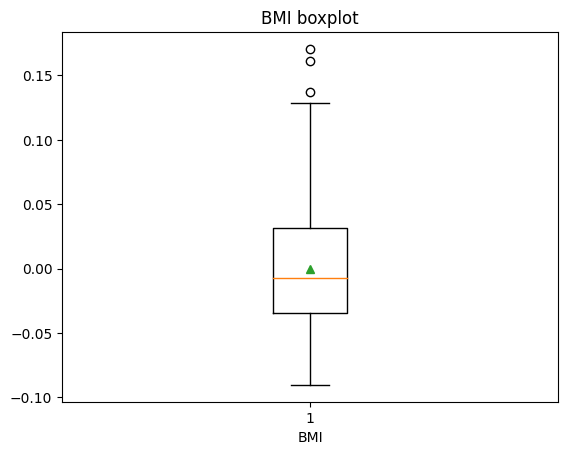

In [34]:
plt.title('BMI boxplot')
plt.xlabel('BMI')
plt.boxplot(X ,showmeans=True) 
plt.show()

- There are some `outliers` in the dataset
- The data `is not systematically`

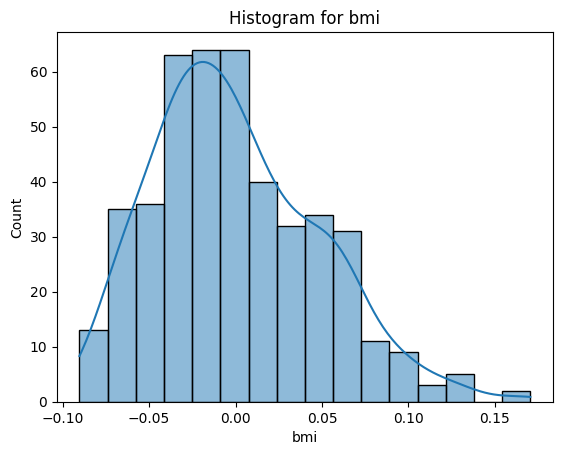

In [43]:
plt.title('Histogram for bmi')
sns.histplot( data= X, kde= True )
plt.show()

The data is `Positively Skewed`  therefore most of the data falls to the __right__ of the graph's peak

### Analysing independent variable `y`

In [44]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

- Data seems to be in the standardized form as the `median` is very close to __0__


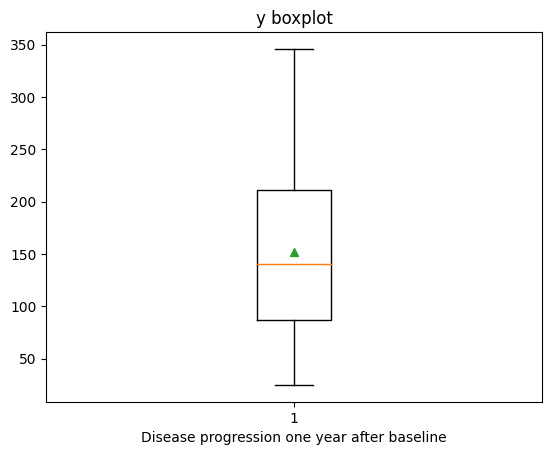

In [45]:
plt.title('y boxplot')
plt.xlabel('Disease progression one year after baseline')
plt.boxplot(y ,showmeans=True)  
plt.show()

- There are `no outliers` in y
- however the data `is not systematically`

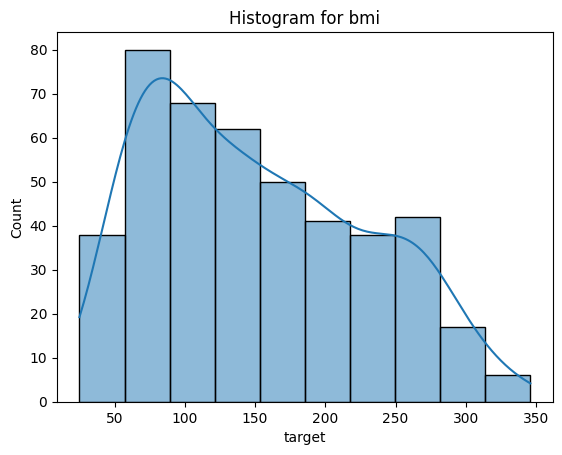

In [46]:
plt.title('Histogram for bmi')
sns.histplot( data= y, kde= True )
plt.show()

`y` has a `bimodal` shape of histogram

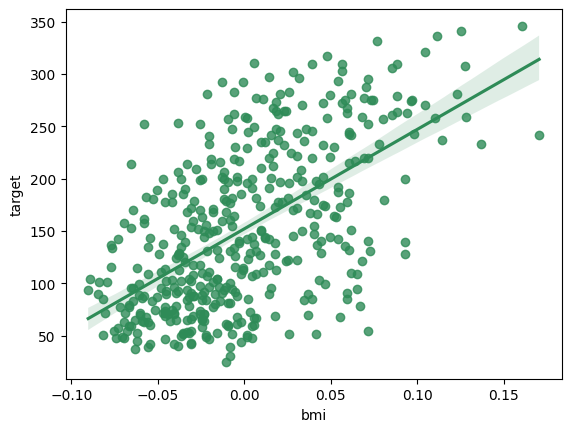

In [55]:
sns.regplot(x= X, y=y , color= 'seagreen')
plt.show()

- There is a `positive relation` between X and y.
- However , there is a `moderate relation`.
- Therefore `BMI` can't be much useful feature inorder to predict the `y`.

<Axes: >

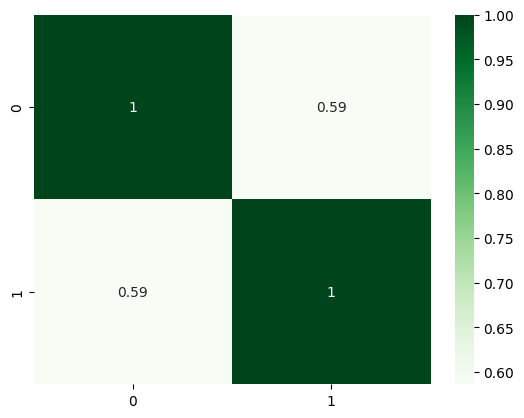

In [23]:
sns.heatmap(np.corrcoef(X,y), annot= True , cmap= 'Greens')

The correation between `X` and `y` is just 0.6 which can considered only as a `moderate (positive) correlation`

## <div id = 's-4'> 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms. </div>

In [56]:
# reshaping the X in the format which is expected by the model
# Also converting X and y to numpy arrays

X = np.array(X).reshape(-1,1)
y = np.array(y)

In [57]:
X.shape

(442, 1)

- Now `X` is a _2-D_ data where the __columns represent the number of features in the data__.
- In this case as this is a single linear regression problem the there is only one feature which is `BMI`

In [66]:
# Importing train_test_split
from sklearn.model_selection import train_test_split 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Dividing the data to 2 categories `Training` and `Testing`
- `Training` contains __80%__ of the total data the and the rest is the `Testing` data
- Model will be trained on the `Training` data
- And the `Testing` data will be used to evaluate the model

In [68]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((353, 1), (353,), (89, 1), (89,))

## <div id='s-5'>5. Explore many different models and short-list the best ones.</div>

__As the `only model` we have is `Simple Linear Regression` therefore it would be the `best one`__

In [61]:
# Train the model
from sklearn.linear_model import LinearRegression #importing the linear regression model

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

## <div id='s-6'>6. Present your solution.</div>

In [70]:
# The coefficients and intercept
print('Coefficients or the Slope(m) of the model is: \t', model.coef_[0])
print('intercept(c) of the model is: \t',model.intercept_)

Coefficients or the Slope(m) of the model is: 	 998.5776891375593
intercept(c) of the model is: 	 152.00335421448167


In [64]:
# Finding the error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Mean Absolute error: %.2f' % mean_absolute_error(y_test, y_pred))

Mean squared error: 4061.83
Mean Absolute error: 52.26


- As there where `outliers` in the data the __MSE__ is very high as it is sensitive towards the outliers.
- On the other hand, __MBE__ treats all the errors the same.

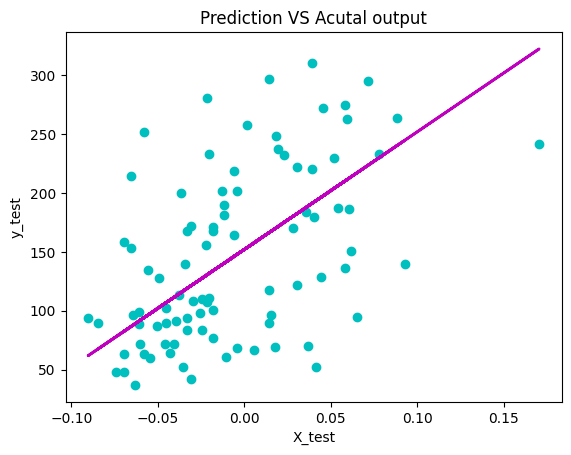

In [75]:
# Plot outputs
plt.title('Prediction VS Acutal output')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.scatter(X_test, y_test,  color='c') # Actual Values
plt.plot(X_test, y_pred, color='m', linewidth=2) # Predicted Values
plt.show()

### Checking the accuracy of the model using R-Squared Test

In [88]:
from sklearn.metrics import r2_score
print('The model gives the accuracy of: %.2f'%(r2_score(y_test,y_pred)*100), '%')

The model gives the accuracy of: 23.34 %


#### The Accurary of the model is `very bad`, Therefore in order to improve the accuracy of the model we can:
- Increase the most useful features
- Try another models